<a href="https://colab.research.google.com/github/bekku/deeplearning/blob/master/202005_4%E9%80%B1%E5%B7%A1%E5%9B%9E%E3%82%BB%E3%83%BC%E3%83%AB%E3%82%B9%E3%83%9E%E3%83%B3%E5%95%8F%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import random
def generate_rand_cities(points):
    positions = np.zeros((points, 2))
    for i in range(points):
        positions[i, 0] = random.random()
        positions[i, 1] = random.random()
    return positions
  

In [2]:
#地点n個のランダム生成
generate_rand_cities(10)

array([[0.70313207, 0.18247602],
       [0.90396589, 0.46632383],
       [0.33245901, 0.26636022],
       [0.99978852, 0.57518042],
       [0.33043877, 0.36369331],
       [0.12883407, 0.33952997],
       [0.96431814, 0.54170013],
       [0.79377202, 0.24913175],
       [0.43013545, 0.45190178],
       [0.02248272, 0.57248315]])

In [0]:
#num_indivisual=1世代の個体数
#num_cities=都市の数
def generate_init_genes(num_indivisual, num_cities):
    genes = np.zeros((num_indivisual, num_cities), dtype=np.int16)
    #タイプを指定して、0の行列作成
    
    
    for i in range(num_indivisual):
        #num_indivisual=行数＝1世代の個体数(都市の周り方) 
        
        genes[i,] = random.sample(range(num_cities), k=num_cities)
        #各個体を都市数分、ランダムに代入。rangeの範囲で、k回行う。
        
    return genes

In [4]:
#出力はランダムな都市の周り方
generate_init_genes(15, 10)

array([[5, 6, 2, 0, 3, 9, 4, 7, 8, 1],
       [1, 2, 7, 8, 4, 0, 6, 5, 9, 3],
       [2, 6, 0, 4, 8, 1, 3, 5, 9, 7],
       [7, 0, 9, 6, 8, 2, 4, 5, 3, 1],
       [8, 1, 2, 7, 5, 4, 0, 9, 3, 6],
       [1, 8, 9, 7, 2, 6, 3, 4, 5, 0],
       [4, 9, 2, 0, 8, 7, 6, 1, 3, 5],
       [7, 2, 4, 9, 5, 8, 0, 1, 3, 6],
       [8, 7, 9, 1, 2, 3, 6, 4, 0, 5],
       [0, 9, 6, 3, 2, 7, 1, 4, 8, 5],
       [0, 8, 5, 1, 4, 9, 2, 6, 3, 7],
       [5, 6, 4, 3, 9, 7, 1, 0, 8, 2],
       [3, 4, 6, 1, 7, 9, 5, 2, 0, 8],
       [9, 6, 8, 2, 4, 7, 5, 3, 0, 1],
       [8, 1, 5, 2, 0, 3, 6, 9, 4, 7]], dtype=int16)

In [0]:
#入力は都市の位置と遺伝子、出力は距離の値
def sum_path(positions, gene):
    sum = 0.
    for i in range(len(positions)-1):
        sum += np.linalg.norm(positions[int(gene[i])]-positions[int(gene[i+1])])
        #np.linalg.normにより、座標間の距離を導出しています。
    return sum

In [6]:
cities = generate_rand_cities(10)
#ランダムな都市
genes = generate_init_genes(15, 10)
#ランダムな遺伝子(経路)

for i in range(15):
    print(sum_path(cities, genes[i]))

5.487117521930649
5.423567721035384
5.2427556229195655
4.725011717284678
5.245338187992453
3.686620796518776
4.451009345268499
4.043582915756069
5.315450619933299
4.825988936786501
5.044366190785531
4.656581719270533
5.094739648173692
5.8061504827990404
3.5132573394024584


In [0]:
#出力は距離の値
def genes_path(genes, cities):
    pathlength_vec = np.zeros(len(genes))
    for i in range(len(genes)):
        indices = genes[i]
        pathlength_vec[i] = sum_path(cities, indices)
    return pathlength_vec

In [8]:
cities = generate_rand_cities(10)
genes = generate_init_genes(15, 10)
for i in range(15):
    print(sum_path(cities, genes[i]))

genes_path(genes, cities)

5.23578121576929
4.33450925521165
4.650901859567029
4.0170227030779095
4.941840271190038
4.104826448508451
5.002401031106198
4.159337592688968
4.573509584663302
4.178607257216536
4.494271056563981
3.6908542711577645
3.8174290947765703
5.578879409842856
4.497730575240816


array([5.23578122, 4.33450926, 4.65090186, 4.0170227 , 4.94184027,
       4.10482645, 5.00240103, 4.15933759, 4.57350958, 4.17860726,
       4.49427106, 3.69085427, 3.81742909, 5.57887941, 4.49773058])

選択の内でも交叉する両親を選ぶものと、ダイレクトに子孫として残す個体を選ぶものの2種類存在します。
前者にはルーレット選択やランキング選択などがあり、後者にはエリート選択があります。
<p>交叉する両親選び  :ルーレット、ランキング選択</p>
<p>子孫として残す    :エリート選択</p>

In [0]:
#ルーレット選択は適応度に応じて選択される確率
#これはそれぞれの確率を出す機械

def generate_roulette(fitness_vec):
    total = np.sum(fitness_vec)
    roulette = np.zeros(len(fitness_vec))
    for i in range(len(fitness_vec)):
        roulette[i] = fitness_vec[i]/total
    return roulette

In [10]:
fitness = np.array([20,50,30])
generate_roulette(fitness)

array([0.2, 0.5, 0.3])

In [11]:
#小さければ小さいほど、適応度が高いため割合を高くします。
#例:1,3,5だと、1の方が適応度が高く、5が最も適応度が低い。
#そのため、逆数をとると、それぞれの関係性が逆転しない。
#1/1,1/3,1/5のとき、最も適応度が高く値が大きいのは1/1である。最も適応度が低く値が小さいのは1/5である。

cities = generate_rand_cities(5)
genes = generate_init_genes(3, 5)
#都市数=5、遺伝子(個体数)=3
 
path = genes_path(genes, cities)
#それぞれの距離が求まるよ
inverse_path = 1/path
print("path length: "+str(path))
print("roulette table: "+str(generate_roulette(inverse_path)))
#経路を全て逆数を取り、各値の割合値を出力する。これは適応度が高い＝経路が短いものほど、値が大きくなり割合が大きくなる。

path length: [2.37448286 1.98402468 2.09463093]
roulette table: [0.30026374 0.35935596 0.3403803 ]


In [12]:
#↑の出力例
#path length: [2.49606493 2.08933829 2.69252368]
#roulette table: [0.32033795 0.3826974  0.29696464]
1/2.08933829/(1/2.49606493+1/2.08933829+1/2.69252368)

0.38269740166443134

In [0]:
#ギモン：引数はなに？
#解答：それぞれの引数の逆数だよ？脳味噌ついてる？

def roulette_choice(fitness_vec):
    roulette = generate_roulette(fitness_vec)
    #generate_rouletteは確率求める機械だよ。
    
    choiced = np.random.choice(len(roulette), 2, replace=True, p=roulette)
    #第一引数:個体数、第二引数は選ぶ数字の数
    #replace=は重複を許すか否かのオプション
    #p=でそれぞれが選ばれる確率を指定しています。(同様に確かではなくなった！！！！！！)
    
    #これによって、個体数分が選出されるよ。
    return choiced

In [14]:
cities = generate_rand_cities(10)
genes = generate_init_genes(6, 10)
print(cities)
print(genes)
print(genes_path(genes, cities))
fitness_vec = 1 / genes_path(genes, cities)
#それぞれの距離の逆数である。

for i in range(3):
    print(roulette_choice(fitness_vec))
    #3回選んでみたよ。
    
#乱択ではあるが、どうやら小さいのが選ばれている

[[0.30786486 0.24104166]
 [0.28840001 0.99721462]
 [0.69787608 0.3039717 ]
 [0.24464675 0.6178538 ]
 [0.15639191 0.55497962]
 [0.961795   0.75070691]
 [0.24717705 0.62485816]
 [0.4608081  0.2189678 ]
 [0.0879689  0.94180488]
 [0.74217123 0.45467846]]
[[8 3 4 7 6 1 5 9 0 2]
 [9 8 5 4 1 3 2 0 6 7]
 [2 8 5 7 3 6 1 9 4 0]
 [8 0 1 6 7 5 3 2 4 9]
 [5 8 1 2 0 7 4 9 6 3]
 [0 3 7 4 2 8 5 1 9 6]]
[3.7196827  5.17598205 4.99348638 5.52655251 4.03573917 5.61080292]
[5 2]
[1 4]
[0 1]


In [0]:
#~ここまでの流れ~
#①遺伝子個、道のりをランダム出力
#②それぞれの座標間の差の合計を求めていく。
#③適応度の高いもの(差の合計が小さいもの)に高い確率を付与するように、各遺伝子に確率を付与。
#→差の合計を逆数を取ることで、逆数（差の合計）が大きいものほど適応度が高くなる。
#全て逆数（差の合計）の和で、各逆数（差の合計）を割ることでそれを確率とする。※大きい値ほど、割合が大きいため
#④その確率に従い、いくつかの個体数を取得する。
#choiced = np.random.choice(選ぶ数字の範囲(遺伝子の個数分), 選ぶ数, replace=True(重複OK), p=各要素の確率配列)

In [0]:
#交叉

#交叉方法として、循環交叉や順序交叉などが挙げられますが、部分的交叉を今回は使用（いっぱいあるんだね。）

#~方法~

# ①ランダムで切れ目を選択する。
# ②indexが一致する親同士のそれぞれの値を比較する。
# ③値が相異なるならば、それぞれの値に対応する、各配列ないでswapを行う。
# 例
# 3 5 1 0 6 4 2
# 6 0 5 2 1 4 3
# ①より切れ目をindex=4とすると。
# →swap
# 3 5 6 0 1 4 2
# 1 0 5 2 6 4 3

# ④index+=1をして、③を繰り返す。

In [0]:
def partial_crossover(parent1, parent2):
    num = len(parent1)
    cross_point = random.randrange(1, num-1)
    #ランダムで切れ目を選択します
    #print("切れ目:"+str(cross_point))
    
    child1 = parent1
    child2 = parent2
    
    for i in range(num - cross_point):
        #iがindexに対応はさせなかったんだね、回数だけのrange()ですね。
        #俺ならこう書く↓
        #for i in rang(num-cross_point,num)んで、iに対応させるのでtarget_indexとかは不必要。
        
        target_index = cross_point + i
         
        target_value1 = parent1[target_index]
        target_value2 = parent2[target_index]
        
        exchange_index1 = np.where(parent1 == target_value2)
        exchange_index2 = np.where(parent2 == target_value1)
        #print("parent1の場所","parent2の場所")
        #print( exchange_index1, exchange_index2)
        
        #target_index(交換する予定のindex)それと交換に対応するindexをexchange_indexとしている。
 
        child1[target_index] = target_value2
        child2[target_index] = target_value1
        child1[exchange_index1] = target_value1
        child2[exchange_index2] = target_value2
        
        #npのことよーわからんけど、とりあえずswapしてるってことはわかる、おそらく、whereがif的効力作用しているね
    return child1, child2

In [18]:
genes = generate_init_genes(2, 10)
print("parent1: "+str(genes[0]))
print("parent2: "+str(genes[1]))
child = partial_crossover(genes[0], genes[1])
print("child1:  "+str(child[0]))
print("child2:  "+str(child[1]))

parent1: [4 0 3 7 8 6 1 2 5 9]
parent2: [9 5 8 6 2 7 4 3 0 1]
child1:  [1 0 3 7 2 6 9 8 5 4]
child2:  [4 5 2 6 8 7 1 3 0 9]


In [0]:
# 突然変異（転座）

# 突然変異にも様々な手法が存在します。
# 転座はランダムで選んだ2つの要素を交換するものです。

In [0]:
# 引数：|（個体数5、都市数10）の遺伝子|、|突然変異がおこるかもしれない個体数3|、|突然変異の確率を0.7に設定しています。|

def translocation_mutation(genes, num_mutation, p_value):
    mutated_genes = genes
    for i in range(num_mutation):
        mutation_flg = np.random.choice(2, 1, p = [1-p_value, p_value])
        #print(mutation_flg)
        #おそらく最初の値の範囲を2としているため、0~1までを値と取っているようだ.
        #p = [1-p_value, p_value]の要素個数と2というのは一致してなければいけないようである。ちな、2にはリストいれれるでい！
        if mutation_flg == 1:
            mutation_value = np.random.choice(genes[i], 2, replace = False)
            #replace = False　重複NG、確かに確率が歪むね。0.7じゃなくて重複時は動かないからね。
            #genes[i]から二つをランダムで取り出しているようだね。その戻り値がリストで返されているから[0],[1]で変更一がわかるね。
            mutation_position1 = np.where(genes[i] == mutation_value[0])
            mutation_position2 = np.where(genes[i] == mutation_value[1])
            mutated_genes[i][mutation_position1] = mutation_value[1]
            mutated_genes[i][mutation_position2] = mutation_value[0]
    return mutated_genes

In [21]:
genes = generate_init_genes(5, 10)
print("before")
print(genes)
print("after")
print(translocation_mutation(genes, 3, 0.7))

#上から三番目までを、突然変異（swap）するかも？？？

before
[[8 0 4 7 2 9 5 6 3 1]
 [7 9 8 4 3 5 6 2 1 0]
 [8 0 4 5 9 1 6 2 3 7]
 [6 5 8 3 0 4 1 7 2 9]
 [4 9 5 7 0 3 6 2 8 1]]
after
[[8 0 4 7 2 9 5 6 3 1]
 [7 4 8 9 3 5 6 2 1 0]
 [8 0 4 5 9 1 6 2 3 7]
 [6 5 8 3 0 4 1 7 2 9]
 [4 9 5 7 0 3 6 2 8 1]]


In [0]:
import matplotlib.pyplot as plt
def show_cities(cities):
    for i in range(len(cities)):
        plt.scatter(cities[i][0], cities[i][1])
        #scatterで座標各印。

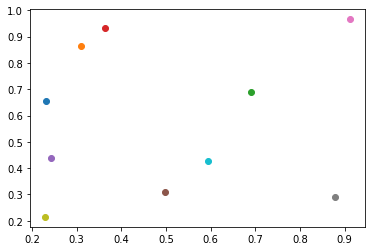

In [23]:
cities = generate_rand_cities(10)
#各座標のランダム配列を代入している。
show_cities(cities)

In [0]:
#5/25ここは後回しにします。

def show_route(cities, genes):
    for i in range(len(genes)-1):
        if i == 0:
            plt.text(cities[int(genes[i])][0], cities[int(genes[i])][1], "start")
        else:
            plt.text(cities[int(genes[i])][0], cities[int(genes[i])][1], str(i))
        plt.plot([cities[int(genes[i])][0], cities[int(genes[i+1])][0]], 
                 [cities[int(genes[i])][1], cities[int(genes[i+1])][1]])
    plt.text(cities[int(genes[i+1])][0], cities[int(genes[i+1])][1], "goal")

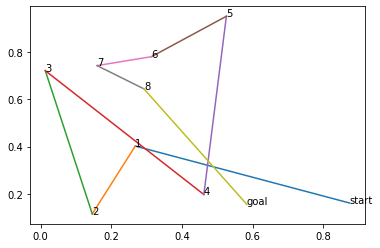

In [51]:
cities = generate_rand_cities(10)
genes = generate_init_genes(10, 10)
show_route(cities, genes[0])

In [0]:
num_cities = 20
indivisuals = 21
generation = 10000
elite = 9
p_mutation = 0.005

# 項目	変数名	例での値
# 都市数	num_cities	20
# 個体数	indivisuals	21
# 世代数	generation	10000
# エリート選択数	elite	9
# 突然変異率	p_mutation	0.005

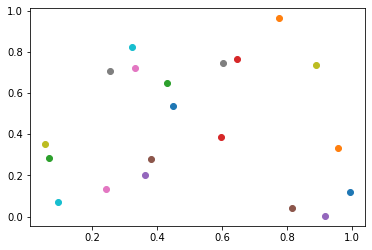

In [53]:
cities = generate_rand_cities(num_cities)
genes = generate_init_genes(indivisuals, num_cities)
show_cities(cities)

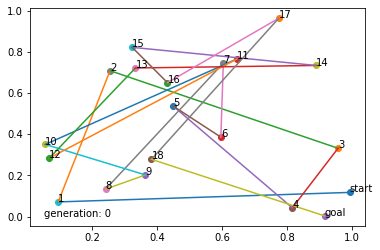

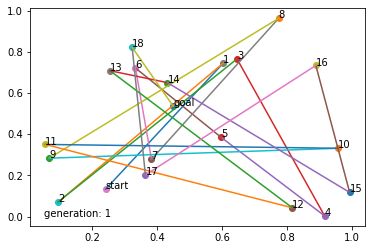

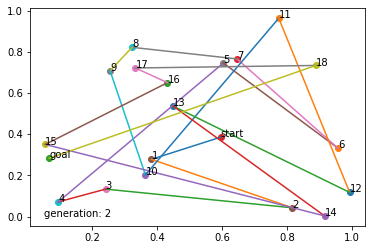

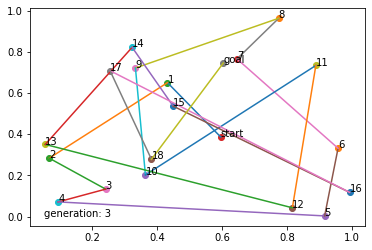

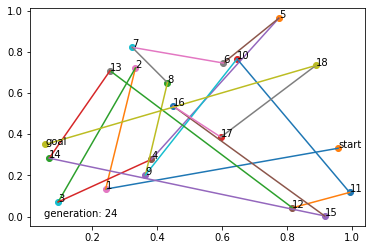

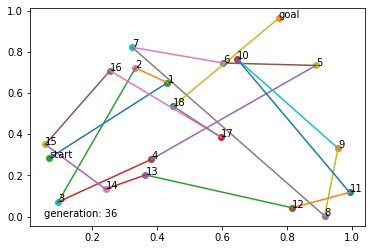

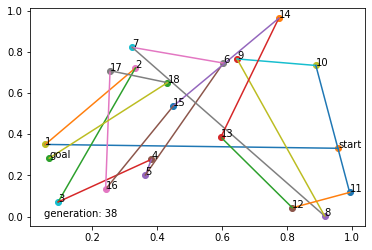

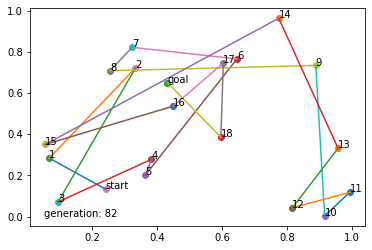

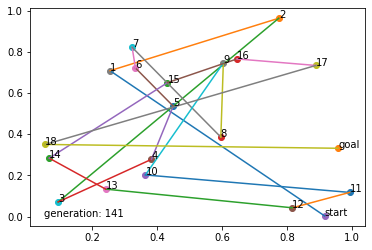

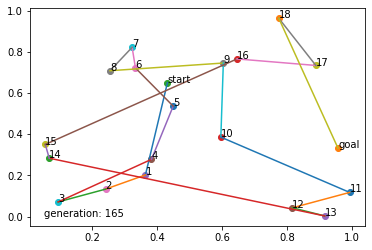

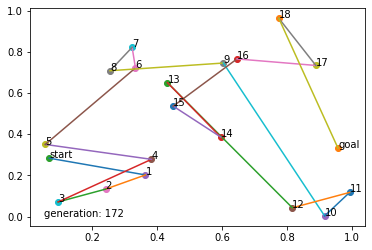

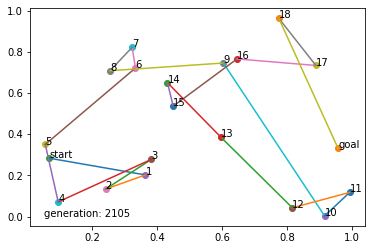

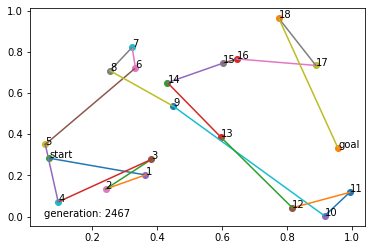

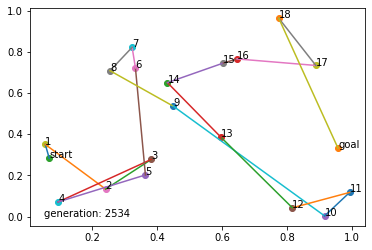

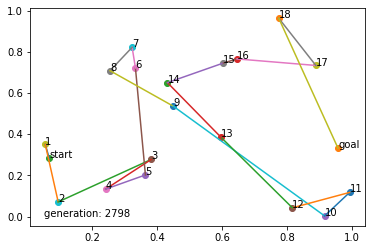

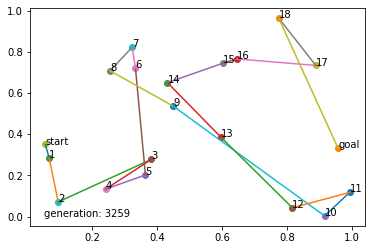

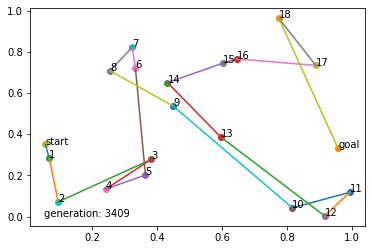

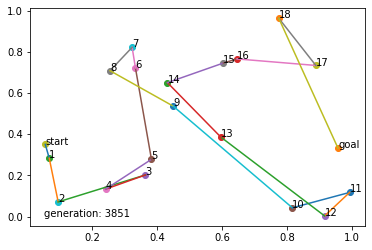

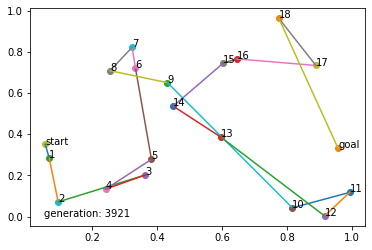

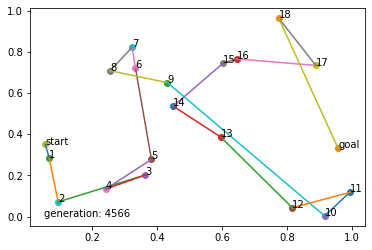

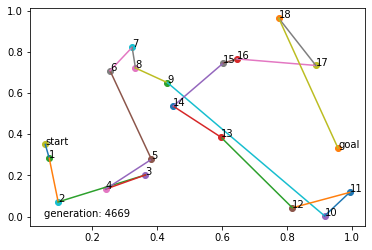

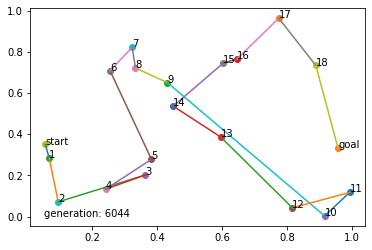

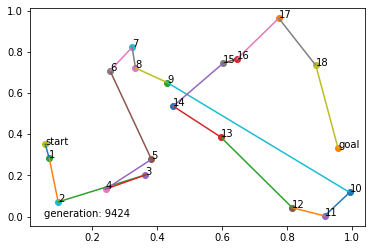

In [54]:
top_indivisual=[]
max_fit = 0
for i in range(generation):
    fitness_vec = np.reciprocal(genes_path(genes, cities))
    #それぞれの適応度に対応する確率を表示する。
    child = np.zeros(np.shape(genes))
    for j in range(int((indivisuals-elite)/2)):
        parents_indices = roulette_choice(fitness_vec)
        child[2*j], child[2*j+1] = partial_crossover(genes[parents_indices[0]], genes[parents_indices[1]])
    
    for j in range(indivisuals-elite, indivisuals):
        child[j] = genes[np.argsort(fitness_vec)[j]]

    child = translocation_mutation(child, indivisuals-elite, p_mutation)
    top_indivisual.append(max(fitness_vec))
    genes = child
    if max(fitness_vec) > max_fit:
        max_fit = max(fitness_vec)
        show_cities(cities)
        show_route(cities, child[np.argmax(fitness_vec)])
        plt.text(0.05, 0.0, "generation: "+str(i))
        plt.show()



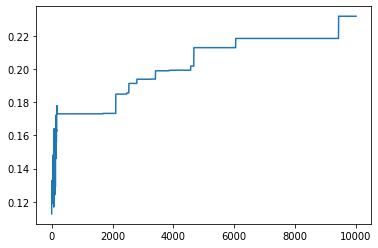

In [55]:
plt.plot(top_indivisual)